# Employee prediction ML Project
0=Not left company
1=Left the company

# import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df1=pd.read_csv('employ_satisfaction_evaluation.csv')

In [3]:
df1.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [5]:
df1.dtypes

EMPLOYEE #              int64
satisfaction_level    float64
last_evaluation       float64
dtype: object

In [6]:
df1.shape

(14999, 3)

In [7]:
#load datasets HR evaluation details
df2=pd.read_csv('HR_comma_sep.csv')
df2.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [9]:
#unique value
df2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
#ge t the show Data type
df2.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [12]:
#merge Two datasets df1 and df2

In [13]:
df=df2.set_index('employee_id').join(df1.set_index('EMPLOYEE #'))
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [14]:
#reset index
df=df.reset_index()

In [15]:
#ready uor dataset
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


# Data Cleaining

In [17]:
#get some stasistick
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#check the null value
df.isna().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [19]:
#how many column in present empty value
df.isnull().any().value_counts()

False    9
True     2
dtype: int64

In [20]:
#show the only empty row
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [21]:
#handle the empty row

In [22]:
df.fillna(df.mean(),inplace=True)
df

C:\Users\NBALUDEO\AppData\Local\Temp/ipykernel_24020/1351106731.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [23]:
#check again empty column
df.isna().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [24]:
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [25]:
# get some stat
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.61283,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.24849,0.170984
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.09000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.44000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.64000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.82000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [26]:
#check the empty row fill or not
df[120:124]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
120,1739,4,158,4,1,1,0,technical,low,0.61283,0.716125
121,1741,2,135,3,0,1,0,technical,low,0.40000,0.460000
122,1742,4,216,6,0,1,0,technical,low,0.75000,1.000000
123,1743,6,300,5,1,1,0,support,low,0.11000,0.840000


In [27]:
#df[df['employee_id']==1]

In [28]:
#groupby method
df.groupby('department').sum()
#df.groupby('department').mean()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,56344929,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,32948168,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,34474313,2934,154292,2702,96,204,14,446.68283,550.706125
hr,31664725,2701,146828,2480,89,215,15,442.53566,524.006125
management,33597098,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,40715777,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,44016858,3434,180369,3135,132,198,0,559.19566,644.662250
sales,192072490,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,97874011,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [29]:
#Count Department
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [30]:
#get the how many employee left
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Data Visualization

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

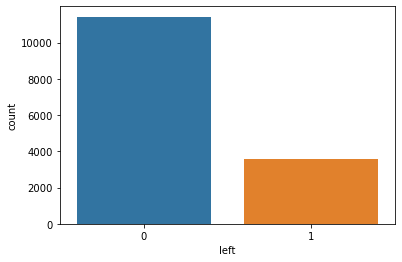

In [31]:
sns.countplot(df.left)

In [32]:
df.corr()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
employee_id,1.000000,-0.009225,-0.007175,0.104660,0.010482,-0.099736,0.079406,0.041777,-0.011501
number_project,-0.009225,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776
average_montly_hours,-0.007175,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014
time_spend_company,0.104660,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078
Work_accident,0.010482,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779
left,-0.099736,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876
promotion_last_5years,0.079406,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815
satisfaction_level,0.041777,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783
last_evaluation,-0.011501,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000


<AxesSubplot:>

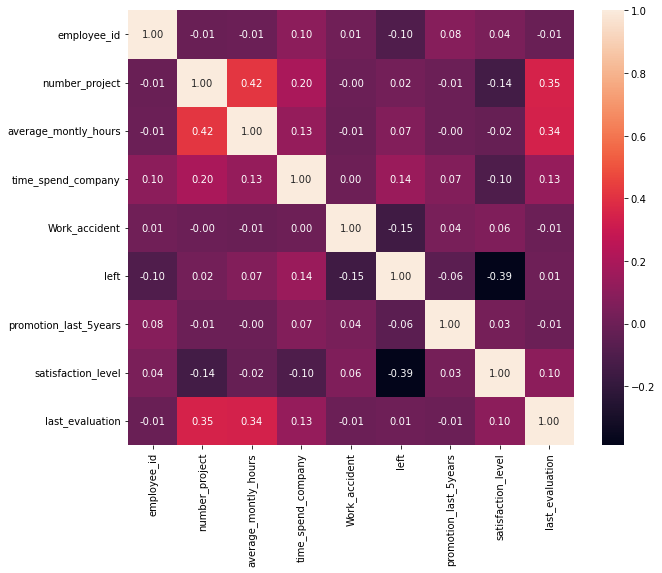

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

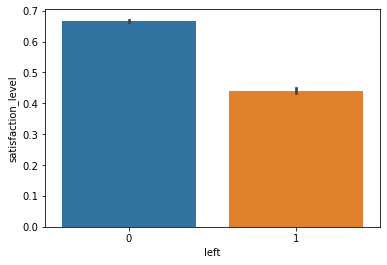

In [34]:
sns.barplot(df.left,df.satisfaction_level)

<AxesSubplot:xlabel='left', ylabel='promotion_last_5years'>

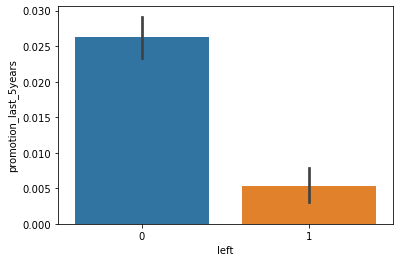

In [35]:
sns.barplot(x='left',y='promotion_last_5years',data=df)

<AxesSubplot:xlabel='left', ylabel='Work_accident'>

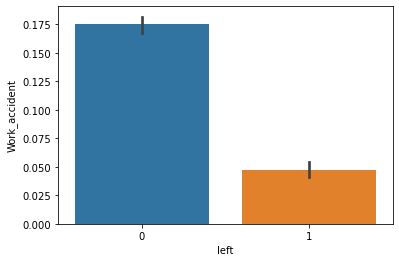

In [36]:
sns.barplot(x='left',y='Work_accident',data=df)

In [37]:
g=df.groupby(['department']).sum()

<AxesSubplot:xlabel='department', ylabel='left'>

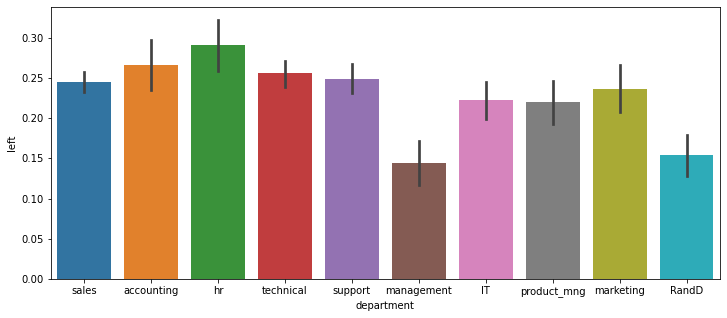

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x='department',y='left',data=df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

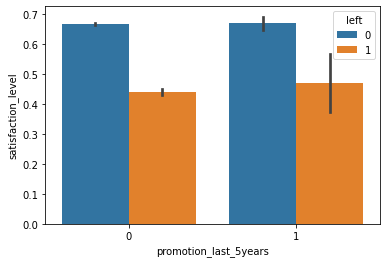

In [39]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=df,hue='left')

In [40]:
df.drop('employee_id',axis=1,inplace=True)

In [41]:
#sns.pairplot(df,hue='left')

In [42]:
sns.pairplot(df.iloc[:,:],hue='left')

In [43]:
df.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'department',
       'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

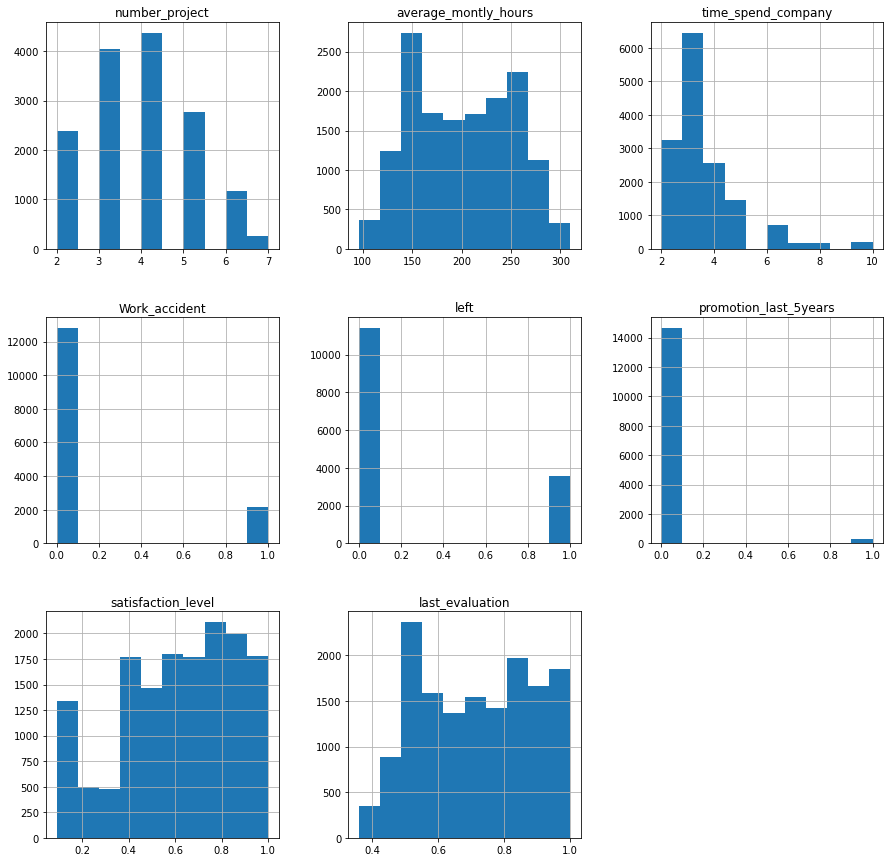

In [44]:
x=df[['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'department',
       'salary', 'satisfaction_level', 'last_evaluation']]
x.hist(figsize=(15,15))
plt.show()

# Data Preprocessing

In [45]:
#Label Encoder
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['department']=le.fit_transform(df['department'])
df['salary']=le.fit_transform(df['salary'])

In [47]:
df['salary'].unique()


array([1, 2, 0])

In [48]:
df['department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [49]:
df[df['department']==4]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
60,5,226,5,0,1,0,4,2,0.85000,0.910000
82,4,139,3,0,1,1,4,1,0.79000,0.590000
137,2,129,3,0,1,0,4,1,0.61283,0.716125
158,2,136,3,0,1,0,4,1,0.39000,0.500000
213,2,153,3,0,1,0,4,1,0.45000,0.460000
...,...,...,...,...,...,...,...,...,...,...
14805,6,255,4,0,1,0,4,1,0.10000,0.770000
14826,7,267,4,0,1,0,4,2,0.10000,0.880000
14873,6,275,4,0,1,0,4,1,0.10000,0.790000
14928,2,141,3,0,1,0,4,1,0.44000,0.520000


# Data Spliting

In [50]:
X=df.drop('left',axis=1)
y=df.left

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [52]:
#size of training and testing

print(f'the size of X_train : {X_train.shape} and the size of X_test : {X_test.shape}')
print(f'the size of y_train : {y_train.shape} and the size of Xy_test : {y_test.shape}')

the size of X_train : (10499, 9) and the size of X_test : (4500, 9)
the size of y_train : (10499,) and the size of Xy_test : (4500,)


# import algorithm

In [53]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
def model_1(X_train,y_train):
    
# Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(solver='liblinear')
    log.fit(X_train, y_train)
    
#Decision Tree algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train, y_train)

#Random forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10)
    forest.fit(X_train, y_train)
    

    
    #check Score
    print('[0] logistic Regression score:',log.score(X_train,y_train))
    print('[1] Decision Classifier score:', tree.score(X_train,y_train))
    print('[2] RandomForest Classifier score:',forest.score(X_train,y_train))
    
    return log,tree, forest, 


In [55]:
model=model_1(X_train, y_train)

[0] logistic Regression score: 0.7708353176492999
[1] Decision Classifier score: 1.0
[2] RandomForest Classifier score: 0.998095056672064


# Classification Report

In [56]:
from sklearn.metrics import classification_report
for i in range(len(model)):
    print('model',i)
    print(classification_report(y_test,model[i].predict(X_test)))

model 0
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3384
           1       0.53      0.26      0.35      1116

    accuracy                           0.76      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500

model 1
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3384
           1       0.94      0.96      0.95      1116

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

model 2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3384
           1       0.99      0.95      0.97      1116

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4

In [57]:
#Decision Tree random Data Prediction

In [86]:
#Decision Tree
#prediction on random feature 
custom=[[3,218,3,0,0,6,1,0.0,1.57]]

In [87]:
category=['Empoyee will stay ','Employee will leave']

In [88]:
model[0].predict(custom)

array([1], dtype=int64)

In [89]:
category[int(model[1].predict(custom))]

'Employee will leave'

In [62]:
#feature importance
model[1].feature_importances_

array([0.17891933, 0.12048936, 0.19719206, 0.00051997, 0.00069425,
       0.01412471, 0.00998213, 0.36168038, 0.11639782])

In [63]:
feature_importance=pd.DataFrame(model[1].feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [64]:
feature_importance

,importance
satisfaction_level,0.361680
time_spend_company,0.197192
number_project,0.178919
average_montly_hours,0.120489
last_evaluation,0.116398
department,0.014125
salary,0.009982
promotion_last_5years,0.000694
Work_accident,0.000520


# Accuracy

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print('[0] logistic Regression accuracy_score:',accuracy_score(y_test, model[0].predict(X_test))*100)
print('[1] logistic Regression accuracy_score:',accuracy_score(y_test, model[1].predict(X_test))*100)
print('[2] logistic Regression accuracy_score:',accuracy_score(y_test, model[2].predict(X_test))*100)
    

[0] logistic Regression accuracy_score: 75.82222222222222
[1] logistic Regression accuracy_score: 97.6
[2] logistic Regression accuracy_score: 98.71111111111112


In [67]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)


In [68]:
#KNeighborsClassifier
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
    
#Select Vector Machine  
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)
      

SVC()

In [69]:
print('[0]knn score:',knn.score(X_train,y_train))
print('[1]svm score:',svm.score(X_train,y_train))

[0]knn score: 0.9772359272311649
[1]svm score: 0.9626631107724545


# classification_report

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [71]:
print('KNN:',classification_report(y_test,knn.predict(X_test)))
print('SVM:',classification_report(y_test,svm.predict(X_test)))

KNN:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3384
           1       0.91      0.93      0.92      1116

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

SVM:               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3384
           1       0.95      0.90      0.92      1116

    accuracy                           0.96      4500
   macro avg       0.96      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [72]:
from sklearn.metrics import accuracy_score

# log_Loss

In [73]:
from sklearn.metrics import log_loss,jaccard_score


In [74]:
log_accuracy=log_loss(y_test,model[0].predict(X_test))
Decision_accuracy=log_loss(y_test,model[1].predict(X_test))
Forest_accuracy=log_loss(y_test,model[2].predict(X_test))
KNN_accuracy=log_loss(y_test,knn.predict(X_test))
SVM_accuracy=log_loss(y_test,svm.predict(X_test))

In [75]:
print('logistic Regression log_loss:',log_accuracy)
print('Decision log_loss:',Decision_accuracy)
print('Random Forest log_loss:',Forest_accuracy)
print('KNN Log_Loss',KNN_accuracy)
print('SVM logg_Loss',SVM_accuracy)

logistic Regression log_loss: 12.20393269843488
Decision log_loss: 14.053739846579527
Random Forest log_loss: 7.905542152612889
KNN Log_Loss 1.3508678677432742
SVM logg_Loss 1.281782141290833


# jaccard_score

In [76]:
log_accuracy=jaccard_score(y_test,model[0].predict(X_test))
Decision_accuracy=jaccard_score(y_test,model[1].predict(X_test))
Forest_accuracy=jaccard_score(y_test,model[2].predict(X_test))
KNN_accuracy=jaccard_score(y_test,knn.predict(X_test))
SVM_accuracy=jaccard_score(y_test,svm.predict(X_test))

In [77]:
print('logistic Regression jaccard_score:',log_accuracy)
print('Decision jaccard_score:',Decision_accuracy)
print('Random Forest jaccard_score:',Forest_accuracy)
print('KNN jaccard_score',KNN_accuracy)
print('SVM jaccard_score',SVM_accuracy)

logistic Regression jaccard_score: 0.34297520661157027
Decision jaccard_score: 0.3411299028427492
Random Forest jaccard_score: 0.07706093189964158
KNN jaccard_score 0.8553820870994249
SVM jaccard_score 0.8573868488471392
